# ANN

Artificial Neural Network의 준말로, 뉴런과 시냅스로 구성된 인체의 신경망을 흉내 낸 인공지능을 일컫는 말

넓은 의미로 사용되지만 단일 은닉 계층을 구성한다는 의미에서 얕은신경망(SNN)이라고도 불리움

입력 계층, 은닉 계층, 출력 계층으로 구성된 ANN은 Regression 및 Classification 문제에 사용된다.

계층마다 노드의 수를 설정할 수 있으며(하이퍼파라미터), 은닉 계층에서는 주로 비선형 함수인 ReLU, tanh를 사용한다.

출력 계층에서는 회귀문제라면 하나의 값을, 분류문제라면 여러 개의 Class 중에서 가장 높은 확률을 지닌 Class를 반환한다.

분류 문제에서는 주로 Sigmoid, Softmax 함수를 통해 얻은 값을 이용한다.


----

Keras를 이용해서는 총 4가지의 방안으로 모델을 구현할 수 있다.

</b>(함수형, 객체지향형) (분산, 연쇄)</b>

In [115]:
from tensorflow.keras.layers import Activation, Dense, Input
from tensorflow.keras.models import Model, Sequential

## 분류 


### 함수-분산

분산을 이해하기 위해서는 클래스의 __call__ 함수에 대해 알아야 할 필요가 있다.

클래스를 하나의 함수로 인지하여 뒤에 오는 인자를 가지고 함수를 실행하는 것을 의미한다.

아래에 __call__ 함수의 예제를 필두로, 분류를 위한 함수형 분산 코드를 서술한다.

In [116]:
class Date():
    def __init__(self, day:int):
        self.day = day

    def __call__(self, num:int):
        return self.day + num

print(Date(2).day)
print(Date(2)(3)) # (3)을 통해 self.day 와 연산을 해주었다.

2
5


In [117]:
def ANN_model_func(inp, hid, out):
    x = Input(shape=(inp, ))
    h = Activation('relu')(Dense(hid)(x))
    y = Activation('softmax')(Dense(out)(h))

    model = Model(x,y)
    model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model


### 함수-연쇄

연쇄는 keras.model.Model이 아닌 Sequential 함수를 통해 순차적으로 계층을 구성해 나아가는 것을 의미한다.

연쇄를 사용하면 비교적 직관적이라 해석에 용이하다.

블로그에 따로 Sequential에 대한 글을 게재했다.

https://blog.naver.com/mcuki/222921842932

In [118]:
def ANN_Seq_func(inp, hid, out):
    model = Sequential()
    model.add(Dense(hid, activation = 'relu', input_shape = (inp, )))
    model.add(Dense(out, activation = 'softmax'))
    model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model

### 객체지향-분산

객체지향형은 class에 Model, Sequential를 부모 클래스로 상속받아 만든다.

비전문가가 사용하기 쉽도록 만들었다.

super().__init__(input, output) 

상속에서 input과 output을 넣어줘 형성시킨다음, self.compile를 통해 컴파일을 거친다

In [119]:
# 분산형이니 Model 상속

class ANN(Model):
    def __init__(self, inp, hid, out):
        hidden = Dense(hid)
        output = Dense(out)
        relu = Activation('relu')
        softmax = Activation('softmax')

        # 요소들을 이어 연결하기

        x = Input(shape=(inp,))
        h = relu(hidden(x)) # Activation('relu')(Dense(hid)(x))와 같다
        y = softmax(output(h))

        super().__init__(x, y)
        self.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

### 객체지향-연쇄

In [120]:
class ANN_Seq(Sequential):
    def __init__(self, inp, hid, out):
        super().__init__()
        self.add(Dense(hid, activation = 'relu', input_shape = (inp,)))
        self.add(Dense(out, activation = 'softmax'))
        self.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
        

### 데이터 수집

<u>Keras, Tensorflow, Pytorch, Scikit-Learn </u> 에는 딥러닝 학습을 위한 데이터셋을 제공하고 있다.

분류 학습을 위해 <b>MNIST</b> 에서 제공한 <u>손으로 쓴 숫자</u> 데이터를 사용할 것이다

0~9까지 총 10가지의 클래스를 가지고 있으며, 사이즈는 28*28 픽셀이다. 명암을 255 단위로 환산하며 255는 가장 검고, 0은 가장 하얀 것을 의미한다.

총 60000개의 그림이 x_train에 할당되고, 그에 대한 레이블이 y_train에 할당된다.

In [121]:
from keras.datasets import mnist
from keras.utils import to_categorical
import numpy as np


(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train[1].shape, y_train[1]


((28, 28), 0)

레이블을 원 핫 인코딩 기법을 통해 0과 1의 이진 벡터로 표현한다.

In [122]:
print(y_train[54])
y_train = to_categorical(y_train)

print(y_train[54])


9
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


28 * 28의 2차원 그림을 1차원으로 축소시켜 3차원이었던 (60000, 28, 28)을 (60000, 784)로 축소시킨다

인자인 -1는 다른 차원을 먼저 할당한 다음 총 데이터에서 그 차원만큼 나눈 값을 자동적으로 기입하겠다는 것을 의미한다

-1 : 60000 * 28 * 28 / 28 * 28 = 60000

In [123]:
L, H, W = x_train.shape
x_train = x_train.reshape(-1, H*W)
x_test = x_test.reshape(-1, H*W)

명암의 0~255를 255로 나누어 범위를 0~1로 정규화(normalization)을 진행한다

In [124]:
x_train = x_train / 255
x_test = x_test / 255

아래는 위의 과정을 정리한 것이며, 데이터를 호출할 때 다음과 같은 함수를 통해 손쉽게 얻을 것

In [125]:
def get_number_data():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)

    L, H, W = x_train.shape
    x_train = x_train.reshape(-1, H*W)
    x_test = x_test.reshape(-1, H*W)

    x_train = x_train / 255
    x_test = x_test / 255

    return (x_train, y_train), (x_test, y_test)


### 손실, 정확도를 그래프로 표현하기

Keras의 모델로 구현하면 .history 를 통해 에포크 별 일어난 손실과 정확도에 대한 값을 리스트 형식으로 얻을 수 있다.

이를 이용해서 얼만큼의 손실이 변화하는지, 정확도가 증가하는지를 그래프로 한 눈에 보고자 한다

In [126]:
import matplotlib.pyplot as plt
def show_loss(model):
    plt.plot(model.history['loss'])
    plt.plot(model.history['val_loss'])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Training', 'Validation'], loc='upper left')
    return plt.show()

def show_acc(model):
    plt.plot(model.history['accuracy'])
    plt.plot(model.history['val_accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('accuracy')
    plt.legend(['Training', 'Validation'], loc='upper left')
    return plt.show()

### 본격적인 학습

데이터 하나(그림 하나)의 크기는 784이므로 input은 784가 되어야 하고,

은닉층은 100개, output은 레이블의 갯수에 맞게 10개로 지정한다.

In [127]:
inp = 784
hid = 100
out = 10

In [128]:
(x_train, y_train), (x_test, y_test) = get_number_data()

In [129]:
model = ANN(inp, hid, out)
result = model.fit(x_train, y_train, epochs=5, batch_size = 100, validation_split = 0.2)

Epoch 1/5
 13/480 [..............................] - ETA: 4s - loss: 1.9857 - accuracy: 0.3762

2022-11-18 22:59:02.341915: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


480/480 [==============================] - ETA: 0s - loss: 0.3959 - accuracy: 0.8896

2022-11-18 22:59:06.388504: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


480/480 [==============================] - 5s 10ms/step - loss: 0.3959 - accuracy: 0.8896 - val_loss: 0.2205 - val_accuracy: 0.9370
Epoch 2/5
480/480 [==============================] - 5s 10ms/step - loss: 0.1862 - accuracy: 0.9467 - val_loss: 0.1552 - val_accuracy: 0.9563
Epoch 3/5
480/480 [==============================] - 5s 10ms/step - loss: 0.1354 - accuracy: 0.9616 - val_loss: 0.1362 - val_accuracy: 0.9614
Epoch 4/5
480/480 [==============================] - 5s 10ms/step - loss: 0.1072 - accuracy: 0.9684 - val_loss: 0.1178 - val_accuracy: 0.9659
Epoch 5/5
480/480 [==============================] - 5s 10ms/step - loss: 0.0875 - accuracy: 0.9751 - val_loss: 0.1075 - val_accuracy: 0.9681


In [130]:
test = model.evaluate(x_test, y_test, batch_size=100)
test # Loss, Accuracy

100/100 [==============================] - 1s 7ms/step - loss: 0.1020 - accuracy: 0.9703


[0.10197367519140244, 0.970300018787384]

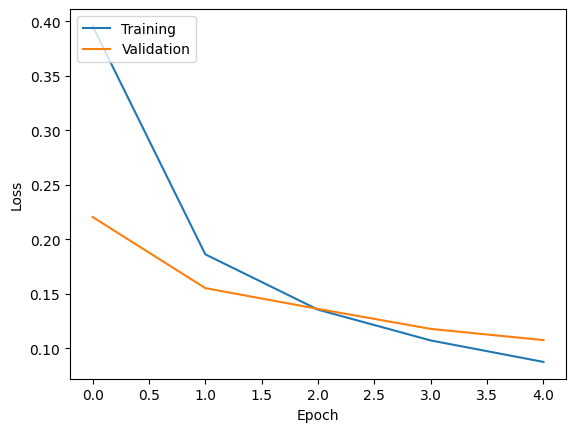

In [131]:
show_loss(result)

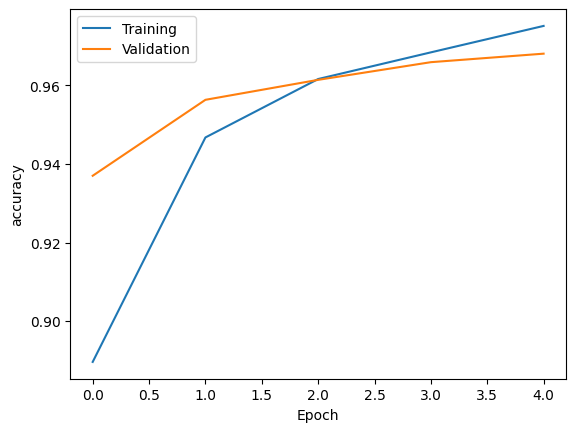

In [132]:
show_acc(result)

## 회귀

회귀를 구현하기 위해서 역시나 객체지향, 함수형으로 분산, 연쇄로 표현가능하다

다만 필자는 연쇄적인 표현이 익숙하며, 객체지향형으로 변환하는데 연습이 필요하다 판단되어 객체지향-연쇄로 모델을 구현할 것이다.

데이터는 keras에서 제공하는 보스턴 집값을 사용할 것이며 집값에 영향을 주는 13개의 변수와, 집값인 레이블로 표현된다.

### 모델구현

In [133]:
class KerasLinear(Sequential):
    def __init__(self, inp, hid, out):
        super().__init__()
        self.add(Dense(hid, activation = 'relu', input_shape = (inp, )))
        self.add(Dense(out,))
        self.compile(loss='mse', optimizer = 'sgd')

### 데이터 수집 및 전처리

scikit-learn processing 중 MinMaxScaler()를 통해 0~1로 정규화를 시켜줄 것이다

In [134]:
from keras.datasets import boston_housing
from sklearn.preprocessing import MinMaxScaler
def get_house_data():
    (x_train, y_train), (x_test, y_test) = boston_housing.load_data()
    
    scaler = MinMaxScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.fit_transform(x_test)

    return (x_train, y_train), (x_test, y_test)
    

In [135]:
(x_train, y_train), (x_test, y_test) = get_house_data()
print(x_train[1], y_train[1], sep='\n')

[1.73654275e-04 8.25000000e-01 5.75513196e-02 0.00000000e+00
 6.17283951e-02 7.84082107e-01 1.31822863e-01 5.36536996e-01
 4.34782609e-02 3.05927342e-01 2.23404255e-01 9.96167230e-01
 3.80794702e-02]
42.3


### 모델 학습

In [136]:
inp = 13
hid = 5
out = 1

model = KerasLinear(inp, hid, out)
(x_train, y_train), (x_test, y_test) = get_house_data()

In [137]:
x_train[1]

array([1.73654275e-04, 8.25000000e-01, 5.75513196e-02, 0.00000000e+00,
       6.17283951e-02, 7.84082107e-01, 1.31822863e-01, 5.36536996e-01,
       4.34782609e-02, 3.05927342e-01, 2.23404255e-01, 9.96167230e-01,
       3.80794702e-02])

In [138]:
result = model.fit(x_train, y_train, epochs=100, batch_size=100, validation_split=0.2, verbose=1)

Epoch 1/100
4/4 [==============================] - 0s 38ms/step - loss: 392.0643 - val_loss: 117.5795
Epoch 2/100
1/4 [======>.......................] - ETA: 0s - loss: 120.1612

2022-11-18 22:59:26.947132: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-18 22:59:27.100129: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 0s 12ms/step - loss: 116.8511 - val_loss: 88.4648
Epoch 3/100
4/4 [==============================] - 0s 11ms/step - loss: 88.1660 - val_loss: 72.6879
Epoch 4/100
4/4 [==============================] - 0s 11ms/step - loss: 68.4707 - val_loss: 70.9410
Epoch 5/100
4/4 [==============================] - 0s 11ms/step - loss: 69.3732 - val_loss: 58.0799
Epoch 6/100
4/4 [==============================] - 0s 10ms/step - loss: 63.7626 - val_loss: 52.4867
Epoch 7/100
4/4 [==============================] - 0s 11ms/step - loss: 52.1817 - val_loss: 51.5673
Epoch 8/100
4/4 [==============================] - 0s 10ms/step - loss: 52.3073 - val_loss: 49.2017
Epoch 9/100
4/4 [==============================] - 0s 11ms/step - loss: 46.3104 - val_loss: 46.7903
Epoch 10/100
4/4 [==============================] - 0s 11ms/step - loss: 46.4035 - val_loss: 47.4936
Epoch 11/100
4/4 [==============================] - 0s 10ms/step - loss: 57.0287 - val_loss: 44.9964
Epoch 12/

### 테스트 데이터 및 학습 과정 시각화

In [139]:
# test를 이용한 손실 계산
model.evaluate(x_test, y_test, batch_size=100)

2/2 [==============================] - 0s 12ms/step - loss: 37.5204


37.520442962646484

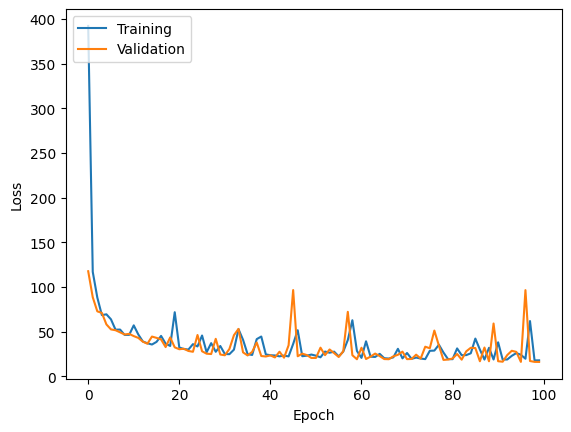

In [140]:
show_loss(result)